In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm


df = pd.read_csv('sample_sales_data.csv')

In [28]:
df.isna().sum()

s.no              0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [29]:
df.dtypes

s.no                int64
transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [30]:
df.shape

(7829, 10)

In [31]:
# s the timestamp formatted correctly? if not, how would you correct it to make it easier to work with

In [43]:
df['timestamp']=pd.to_datetime(df['timestamp'], format='%d-%m-%y %H:%M')
df['timestamp']

0      2022-02-03 09:51:00
1      2022-06-03 10:33:00
2      2022-04-03 17:20:00
3      2022-02-03 17:23:00
4      2022-05-03 14:32:00
               ...        
7824   2022-03-03 18:22:00
7825   2022-04-03 19:14:00
7826   2022-03-03 14:00:00
7827   2022-04-03 15:11:00
7828   2022-06-03 13:50:00
Name: timestamp, Length: 7829, dtype: datetime64[ns]

In [33]:
# can you identify any columns that are unnecessary or repetitive for analysis ?

In [34]:
df = df.drop(columns=['s.no',"transaction_id","product_id"])

In [35]:
# what statistical insights can u gather from numerical data, such as unit_prce and quantity

In [36]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [37]:
# Frequency of customer types

customer_type_counts = df['customer_type'].value_counts()
print('Customer Type Distribution:\n', customer_type_counts)

Customer Type Distribution:
 customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64


In [38]:
# frequency of payment methods

payment_method_counts = df['payment_type'].value_counts()
print('Payment Method Distribution:\n', payment_method_counts)

Payment Method Distribution:
 payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64


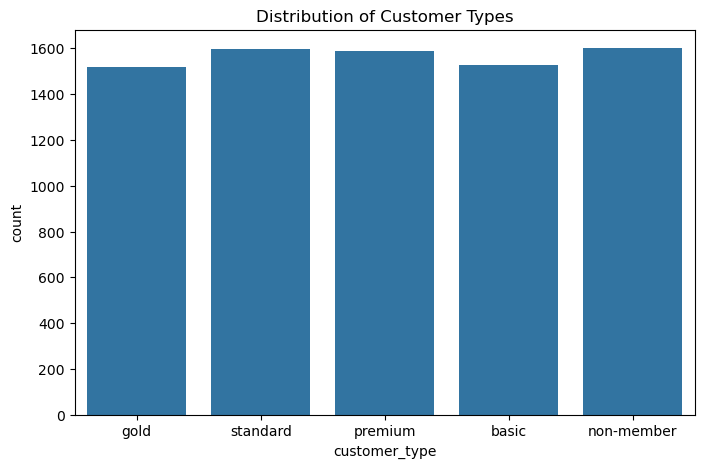

In [39]:
# visualize the distribution of customer types

plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', data = df)
plt.title('Distribution of Customer Types')
plt.show()

In [40]:
# create a new column 'claculated_total' to verify total = unit price x quantity

df['calculated_total'] = df['unit_price']*df['quantity']

# check if there are any discrepancies

discrepancies = df[df['total'] != df['calculated_total']]
if not discrepancies.empty:
    print('Discrepancies found in the total calculation:')
    print(discrepancies)
else:
    print("No discrepancies found. All 'total' values match the expected result.")

Discrepancies found in the total calculation:
             timestamp           category customer_type  unit_price  quantity  \
31    02-03-2022 16:01              fruit         basic        0.19         3   
81    06-03-2022 13:34              fruit          gold        0.19         3   
94    04-03-2022 17:11              fruit       premium        0.19         3   
110   02-03-2022 11:03              fruit       premium        0.19         3   
121   07-03-2022 14:48              fruit       premium        0.19         3   
...                ...                ...           ...         ...       ...   
7624  03-03-2022 13:32  cleaning products          gold       17.19         3   
7642  05-03-2022 13:17  cleaning products      standard       17.19         3   
7650  02-03-2022 13:31  cleaning products       premium       17.19         3   
7654  04-03-2022 12:25  cleaning products      standard       17.19         3   
7679  06-03-2022 16:11  cleaning products    non-member       1

In [41]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Extracting time-based features

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day


In [42]:
df

,timestamp,category,customer_type,unit_price,quantity,total,payment_type,calculated_total,year,month,day
0,2022-02-03 09:51:00,fruit,gold,3.99,2,7.98,e-wallet,7.98,2022,2,3
1,2022-06-03 10:33:00,fruit,standard,3.99,1,3.99,e-wallet,3.99,2022,6,3
2,2022-04-03 17:20:00,fruit,premium,0.19,2,0.38,e-wallet,0.38,2022,4,3
3,2022-02-03 17:23:00,fruit,gold,0.19,4,0.76,e-wallet,0.76,2022,2,3
4,2022-05-03 14:32:00,fruit,basic,4.49,2,8.98,debit card,8.98,2022,5,3
...,...,...,...,...,...,...,...,...,...,...,...
7824,2022-03-03 18:22:00,cleaning products,basic,14.19,2,28.38,e-wallet,28.38,2022,3,3
7825,2022-04-03 19:14:00,cleaning products,standard,16.99,1,16.99,credit card,16.99,2022,4,3
7826,2022-03-03 14:00:00,cleaning products,basic,14.19,2,28.38,credit card,28.38,2022,3,3
7827,2022-04-03 15:11:00,cleaning products,basic,16.99,4,67.96,cash,67.96,2022,4,3


In [44]:
df['category'].unique()

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

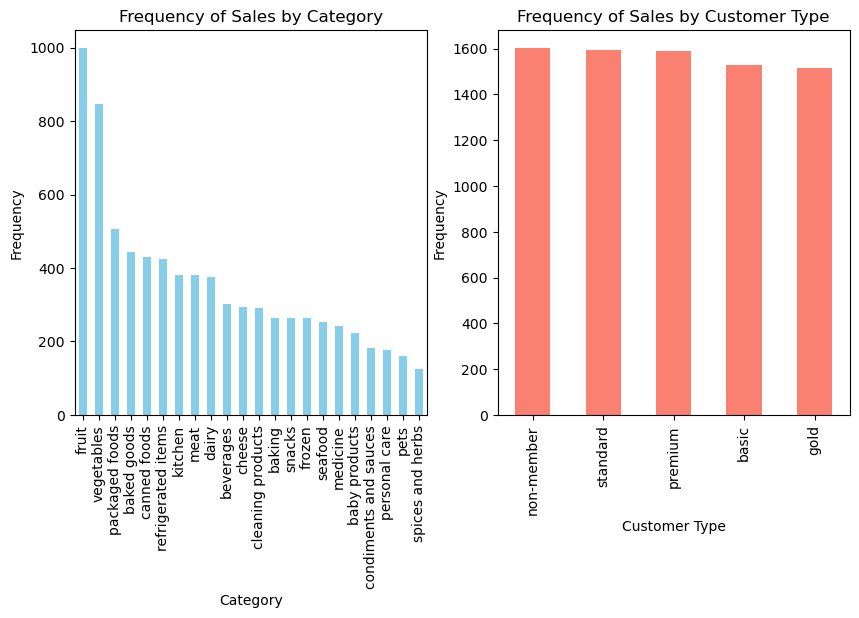

In [49]:
category_freq = df['category'].value_counts()
customer_type_freq = df['customer_type'].value_counts()
#plotting histograms for category and customer type
#category frequency
plt.figure(figsize=(10,5))
#first plot: Sales by Category
plt.subplot(1,2,1) # 1 row, 2 columns, 1st subplot
category_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
#Second plot: Sales by Customer Type
plt.subplot(1,2,2) # 1 row, 2 columns, 2nd subplot
customer_type_freq.plot(kind='bar', color='salmon')
plt.title('Frequency of Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')

#plt.tight_layout()
plt.show()

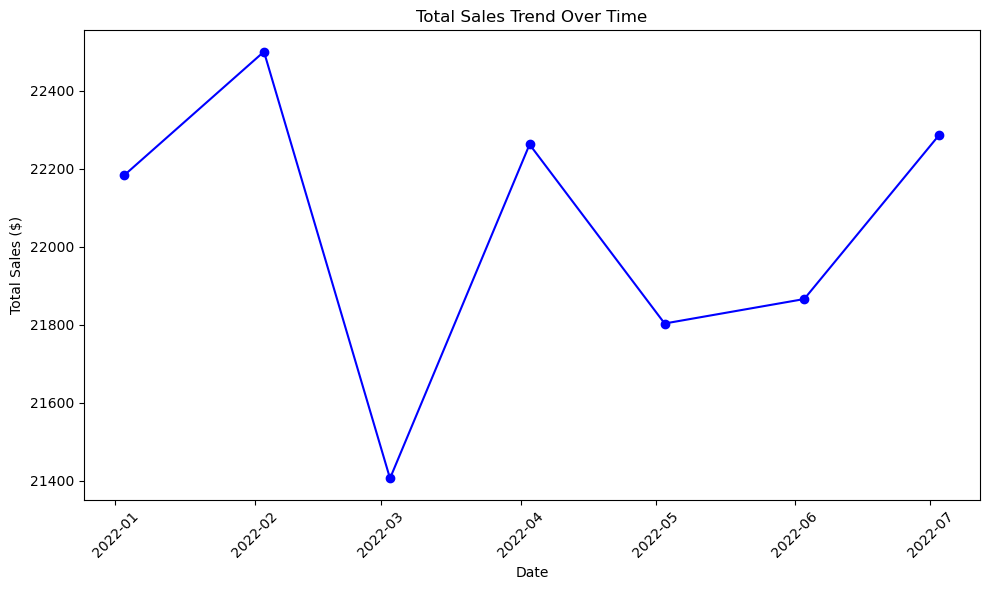

In [50]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Group by date and calculate total sales amount for each day
df['date'] = df['timestamp'].dt.date
daily_sales = df.groupby('date')['total'].sum()
#plotting the trend over time
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
#adding titles and labels
plt.title('Total Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#show the plot
plt.tight_layout()
plt.show()